In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pickle

# load data

In [2]:
# efficiency
df_efficiency=pd.read_csv('preprocessing/efficiency/efficiency_index.csv', index_col=0)
df_efficiency.columns=df_efficiency.columns.astype(int)

f = open('preprocessing/efficiency/efficiency.pickle', 'rb')
dict_eff_model_params, dict_eff_model_cov, dict_eff_error = pickle.load(f)
f.close()

# HDD
f1=open('preprocessing/HDD/HDD_misc.pickle', 'rb')
countries, df_gas_threshold, df_theta, df_HDD_error = pickle.load(f1)
f1.close()

f2=open('preprocessing/HDD/HDD_values.pickle', 'rb')
dict_dfs_daily_HDD, df_annual_HDD_baseline = pickle.load(f2)
f2.close()

f3=open('preprocessing/HDD/clustering.pickle', 'rb')
df_cluster_summary, df_cluster_cardinality, df_representative_year, df_representative_year_HDD, dict_window_start=pickle.load(f3)
f3.close()


In [3]:
# remove NO from gas model
countries=[country for country in countries if country!='NO']
print(countries)
print(len(countries))

['AT', 'BE', 'BG', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LV', 'NL', 'PL', 'RO', 'SI', 'SK', 'FI', 'SE', 'LU', 'PT', 'CH', 'UA']
28


In [4]:
# population 
df_pop1=pd.read_csv('raw_data/Eurostat/population_1990to2021.csv', index_col=0)
df_pop2=pd.read_csv('raw_data/Eurostat/population_2011to2022.csv', index_col=0)
df_pop=pd.concat([df_pop1.loc[countries], df_pop2.loc[countries, '2022']], axis=1)
# shift pop by on year (eurostat takes jan 1 --> shift to dec 31 the prev year)
df_pop=df_pop.rename(dict(zip(df_pop.columns, [int(year)-1 for year in df_pop.columns])), axis=1)
df_pop=df_pop.astype(float)
df_pop

,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
TIME,,,,,,,,,,,,,,,,,,,,,
AT,7644818.0,7710882.0,7798899.0,7882519.0,7928746.0,7943489.0,7953067.0,7964966.0,7971116.0,7982461.0,...,8451860.0,8507786.0,8584926.0,8700471.0,8772865.0,8822267.0,8858775.0,8901064.0,8932664.0,8978929.0
BE,9947782.0,9986975.0,10021997.0,10068319.0,10100631.0,10130574.0,10143047.0,10170226.0,10192264.0,10213752.0,...,11137974.0,11180840.0,11237274.0,11311117.0,11351727.0,11398589.0,11455519.0,11522440.0,11554767.0,11631136.0
BG,8767308.0,8669269.0,8595465.0,8484863.0,8459763.0,8427418.0,8384715.0,8340936.0,8283200.0,8230371.0,...,7284552.0,7245677.0,7202198.0,7153784.0,7101859.0,7050034.0,7000039.0,6951482.0,6916548.0,6838937.0
CZ,10362102.0,10304607.0,10312548.0,10325697.0,10334013.0,10333161.0,10321344.0,10309137.0,10299125.0,10289621.0,...,10516125.0,10512419.0,10538275.0,10553843.0,10578820.0,10610055.0,10649800.0,10693939.0,10701777.0,10516707.0
DE,62679035.0,79753227.0,80274564.0,80974632.0,81338093.0,81538603.0,81817499.0,82012162.0,82057379.0,82037011.0,...,80523746.0,80767463.0,81197537.0,82175684.0,82521653.0,82792351.0,83019213.0,83166711.0,83155031.0,83237124.0
DK,5135409.0,5146469.0,5162126.0,5180614.0,5196642.0,5215718.0,5251027.0,5275121.0,5294860.0,5313577.0,...,5602628.0,5627235.0,5659715.0,5707251.0,5748769.0,5781190.0,5806081.0,5822763.0,5840045.0,5873420.0
EE,1570599.0,1567749.0,1554878.0,1511303.0,1476952.0,1448075.0,1425192.0,1405996.0,1393074.0,1379237.0,...,1320174.0,1315819.0,1314870.0,1315944.0,1315635.0,1319133.0,1324820.0,1328976.0,1330068.0,1331796.0
ES,38853227.0,38881416.0,39051336.0,39264034.0,39458489.0,39639726.0,39808374.0,39971329.0,40143449.0,40303568.0,...,46727890.0,46512199.0,46449565.0,46440099.0,46528024.0,46658447.0,46937060.0,47332614.0,47398695.0,47432805.0
FR,NaN,58313439.0,58604851.0,58885929.0,59104320.0,59315139.0,59522297.0,59726386.0,59934884.0,60158533.0,...,65600350.0,66165980.0,66458153.0,66638391.0,66809816.0,67026224.0,67177636.0,67320216.0,67656682.0,67842582.0


In [5]:
# eurostat gas
df_gas=pd.read_csv('raw_data/Eurostat/gas_demand_for_home_heating_TJ.csv', index_col=0) #[TJ]
df_gas.columns=df_gas.columns.astype(int)
df_gas

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
TIME,,,,,,,,,,,
EU27_2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2530022.0,2502653.0,2441361.0
EA19,1834149.0,1464042.0,1627002.0,1721351.0,1299950.0,2034975.0,2307370.0,2253102.0,2202656.0,2177290.0,2102763.0
BE,NaN,NaN,NaN,NaN,NaN,NaN,118046.0,115226.0,115279.0,113990.0,106491.0
BG,1710.0,1940.0,1852.0,1558.0,1567.0,1712.0,1954.0,2321.0,2609.0,2638.0,3288.0
CZ,NaN,NaN,NaN,NaN,NaN,47627.0,54689.0,55399.0,51038.0,49363.0,51459.0
DK,NaN,NaN,NaN,NaN,NaN,18245.0,19134.0,17890.0,18615.0,18641.0,18177.0
DE,840519.0,649373.0,725013.0,768905.0,609351.0,670194.0,751760.0,720707.0,735319.0,733741.0,712959.0
EE,1684.0,1585.0,1697.0,1604.0,1602.0,1513.0,1775.0,1696.0,1687.0,1772.0,1724.0
IE,NaN,NaN,NaN,NaN,NaN,16686.0,16923.0,16252.0,18043.0,17494.0,17446.0


In [6]:
# add SFOE data for CH
df_CH=pd.read_csv('raw_data/SFOE/residential_space_heating_gas_demand.csv', index_col=0, skiprows=1)
CH_gas=df_CH.loc[range(2010, 2021), 'residential_gas_heating'].values*1000 # PJ to TJ 
df_gas.loc['CH']=CH_gas # PJ to TJ
df_gas

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
TIME,,,,,,,,,,,
EU27_2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2530022.0,2502653.0,2441361.0
EA19,1834149.0,1464042.0,1627002.0,1721351.0,1299950.0,2034975.0,2307370.0,2253102.0,2202656.0,2177290.0,2102763.0
BE,NaN,NaN,NaN,NaN,NaN,NaN,118046.0,115226.0,115279.0,113990.0,106491.0
BG,1710.0,1940.0,1852.0,1558.0,1567.0,1712.0,1954.0,2321.0,2609.0,2638.0,3288.0
CZ,NaN,NaN,NaN,NaN,NaN,47627.0,54689.0,55399.0,51038.0,49363.0,51459.0
DK,NaN,NaN,NaN,NaN,NaN,18245.0,19134.0,17890.0,18615.0,18641.0,18177.0
DE,840519.0,649373.0,725013.0,768905.0,609351.0,670194.0,751760.0,720707.0,735319.0,733741.0,712959.0
EE,1684.0,1585.0,1697.0,1604.0,1602.0,1513.0,1775.0,1696.0,1687.0,1772.0,1724.0
IE,NaN,NaN,NaN,NaN,NaN,16686.0,16923.0,16252.0,18043.0,17494.0,17446.0


In [7]:
df_annual_HDD=df_annual_HDD_baseline.T # transpose to match format
df_annual_HDD

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
AT,2892.839050,2636.265930,2600.758398,2497.438358,2665.205201,2836.824154,2697.693629,2823.476021,2520.766415,2302.651268,...,2810.479457,2351.542156,2505.560326,2574.337334,2050.550596,2249.986161,2365.823085,2458.611535,2247.114158,2232.978313
BE,2011.317810,1954.515665,1919.077897,1882.309344,1867.531958,2275.504807,2082.149760,2108.818373,1691.428434,1702.694601,...,2171.075853,1595.132536,1813.175728,1986.408327,1471.272407,1639.104488,1846.438799,1701.631622,1694.736867,1587.367160
BG,2794.381499,2664.683099,2740.134050,2680.472968,2737.139305,2840.277256,2728.151321,2859.465635,2755.593266,2407.719616,...,2433.587292,2696.939310,2645.925425,2330.386811,2202.369498,2433.903058,2384.230572,2523.026840,2340.930942,2126.906415
CZ,2986.066674,2755.249091,2653.087120,2509.478682,2667.991524,2983.545118,2727.154859,2968.311869,2540.233329,2321.240960,...,2969.688204,2440.867942,2591.628734,2622.694945,2032.062055,2228.079510,2406.554243,2486.430468,2256.151215,2183.827405
DE,2344.847410,2232.323489,2112.776851,2065.105083,2148.172232,2446.864992,2226.258365,2409.254167,1930.667530,1843.356326,...,2455.591898,1855.488391,2012.031465,2134.967474,1597.201119,1764.523367,1968.723739,1893.296000,1797.313670,1751.967503
DK,2568.368114,2560.784260,2376.582923,2217.411350,2276.164069,2734.647472,2523.369553,2592.377028,2236.076344,1971.233570,...,2762.429719,2155.206271,2291.549522,2325.337876,1838.684936,1900.490955,2194.662880,2041.719483,2159.302116,1889.872730
EE,2588.531070,2440.934547,2300.387182,2214.491634,2359.774730,2900.025208,2549.022737,2851.202464,2445.900424,1835.569968,...,2823.810237,2177.781529,2486.968392,2302.930623,2087.954592,1770.125968,2221.592812,2055.048757,2226.841801,1907.153855
ES,1318.202086,1138.212553,1208.439243,1159.488418,1326.750793,1316.673720,1265.443599,1194.708309,1207.305040,1034.001586,...,1354.645378,1162.750263,1266.142081,1282.872299,1129.669301,1119.896278,1117.165409,1165.526885,1194.617045,1097.626298
FR,2213.352464,2065.016430,1977.583874,2087.799894,2130.301903,2331.080961,2195.846735,2215.828164,1849.762181,1805.636247,...,2326.224965,1656.557956,1969.295931,2127.129432,1621.293340,1789.811118,1904.613761,1860.970033,1777.175077,1775.995142
GB,1740.840433,1791.465968,1651.493969,1653.034719,1673.927795,1872.366303,1855.195754,1802.546034,1567.770786,1498.567015,...,1924.155309,1336.677836,1589.338415,1740.852614,1313.235242,1379.534810,1585.086367,1437.541458,1544.606951,1460.488531


In [8]:
df_eff_idx = pd.read_csv('preprocessing/efficiency/efficiency_index.csv', index_col=0)
df_eff_idx.columns=df_eff_idx.columns.astype(int)
df_eff_idx

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
AT,1.308544,1.247721,1.198730,1.159269,1.127484,1.101882,1.081260,1.064649,1.051270,1.040493,...,1.014652,1.010998,1.008055,1.005684,1.003775,1.002237,1.000998,1.0,0.999196,0.998549
BG,1.057444,1.052854,1.048507,1.044391,1.040494,1.036803,1.033308,1.029998,1.026863,1.023895,...,1.013516,1.011255,1.009115,1.007088,1.005169,1.003351,1.001630,1.0,0.998457,0.996995
HR,1.379935,1.366512,1.352619,1.338237,1.323352,1.307944,1.291995,1.275486,1.258399,1.240712,...,1.163535,1.142519,1.120766,1.098249,1.074943,1.050818,1.025847,1.0,0.973246,0.945553
CY,2.119621,1.926215,1.765383,1.631639,1.520420,1.427933,1.351023,1.287067,1.233882,1.189654,...,1.075709,1.058122,1.043496,1.031334,1.021220,1.012810,1.005816,1.0,0.995164,0.991142
CZ,1.329137,1.293687,1.261502,1.232283,1.205754,1.181670,1.159804,1.139952,1.121929,1.105566,...,1.053862,1.043769,1.034606,1.026287,1.018734,1.011877,1.005652,1.0,0.994869,0.990210
DK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.199860,1.135769,1.092090,...,1.018786,1.012365,1.007988,1.005006,1.002973,1.001588,1.000643,1.0,0.999561,0.999263
EE,1.221450,1.207881,1.194611,1.181633,1.168941,1.156528,1.144389,1.132517,1.120907,1.109552,...,1.066579,1.056420,1.046486,1.036770,1.027268,1.017976,1.008888,1.0,0.991308,0.982807
FI,1.247889,1.246562,1.244970,1.243060,1.240767,1.238015,1.234713,1.230751,1.225995,1.220288,...,1.183519,1.169314,1.152266,1.131808,1.107256,1.077792,1.042433,1.0,0.949077,0.887965
FR,1.539391,1.492545,1.448670,1.407578,1.369093,1.333049,1.299292,1.267675,1.238064,1.210332,...,1.115912,1.095927,1.077211,1.059682,1.043264,1.027888,1.013487,1.0,0.987368,0.975538
DE,1.636672,1.562982,1.496838,1.437468,1.384177,1.336343,1.293408,1.254869,1.220277,1.189228,...,1.093733,1.075642,1.059403,1.044828,1.031745,1.020002,1.009461,1.0,0.991508,0.983885


In [9]:
# gas use in TJ per capita, adjusted to 2020 efficiency

# select overlapping years
years=list(set.intersection(set(df_eff_idx.columns), set(df_pop.columns), set(df_gas.columns)))
years.sort()

# base year is 2020
df_gas_capita_20=pd.DataFrame(index=countries, columns=years, data=
    np.divide(np.divide(df_gas.loc[countries, years].values, 
                        df_pop.loc[countries, years].values), 
              df_eff_idx.loc[countries, years].values))
df_gas_capita_20

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
AT,0.006680,0.005813,0.005950,0.006050,0.005121,0.005626,0.006257,0.006091,0.005551,0.005925,0.005875
BE,NaN,NaN,NaN,NaN,NaN,NaN,0.009800,0.009674,0.009775,0.009752,0.009216
BG,0.000227,0.000260,0.000250,0.000212,0.000215,0.000237,0.000273,0.000328,0.000371,0.000379,0.000475
CZ,NaN,NaN,NaN,NaN,NaN,0.004362,0.005037,0.005125,0.004736,0.004590,0.004808
DE,0.009022,0.007114,0.008083,0.008704,0.006977,0.007698,0.008719,0.008437,0.008684,0.008740,0.008574
DK,NaN,NaN,NaN,NaN,NaN,0.003171,0.003312,0.003085,0.003201,0.003199,0.003112
EE,0.001153,0.001100,0.001194,0.001143,0.001153,0.001099,0.001301,0.001252,0.001251,0.001322,0.001296
ES,0.001357,0.001105,0.001162,0.001086,0.001078,0.001185,0.001221,0.001249,0.001408,0.001366,0.001421
FR,0.006451,0.005710,0.006648,0.007051,0.005086,0.005654,0.006286,0.006131,0.005787,0.005737,0.005386
GB,0.013079,0.009786,0.011266,0.011369,0.009435,0.010081,0.010512,0.010420,0.011028,NaN,NaN


[3.68890582]


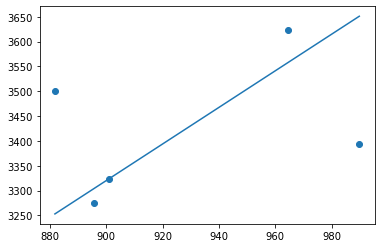

[3.68840613 3.42850173 3.65754458 3.75626993 3.96924669]


In [10]:
# try linear model with y-intercept=0

def func_linear(x,k):
    return x*k

from scipy.optimize import curve_fit

country='IE'
model_years=[year for year in df_annual_HDD.columns if year in  df_gas_capita_20.loc[country].dropna().index]
v_gas=df_gas_capita_20.loc[country, model_years]*1000000 # TJ to MJ 
v_HDD=df_annual_HDD.loc[country, model_years]

# linear model
popt, pcov = curve_fit(func_linear, v_HDD , v_gas, bounds=(0, np.inf))
print(popt)

plt.plot(np.sort(v_HDD), func_linear(np.sort(v_HDD), *popt))

plt.scatter(v_HDD, v_gas)
plt.show()
print(v_gas.values/v_HDD.values)

In [11]:
# compute gas use in MJ per capita per HDD, adjusted to 2020 efficiency

import statsmodels.api as sm

dict_constants={}
dict_L_error={}
dict_nsamples={}
for country in countries:
    model_years=[year for year in df_annual_HDD.columns if year in  df_gas_capita_20.loc[country].dropna().index]
    v_gas=df_gas_capita_20.loc[country,  model_years]*1000000 # TJ to MJ 
    v_HDD=df_annual_HDD.loc[country, model_years]
    
    dict_nsamples[country]=len(model_years)
    
    # scipy linear model
    # popt, pcov = curve_fit(func_linear, v_HDD , v_gas, bounds=(0, np.inf))
    # dict_constants[country]=popt[0]
    # dict_error[country]=pcov[0][0]
    
    # statsmodel 
    model = sm.OLS(endog=v_gas.values, exog=v_HDD.values).fit()
    dict_constants[country]=model.params[0]
    dict_L_error[country]=model.bse[0] # standard error of coefficient L

s_constants=pd.Series(data=dict_constants)
s_constants

AT    2.471567
BE    5.694152
BG    0.113161
CZ    2.063402
DE    4.239181
DK    1.562720
EE    0.533298
ES    1.023261
FR    3.206699
GB    6.974599
GR    1.118779
HR    1.281790
HU    4.267889
IE    3.688906
IT    7.379556
LT    0.582212
LV    0.426400
NL    7.965154
PL    0.765598
RO    1.457339
SI    0.632775
SK    3.023409
FI    0.038002
SE    0.028989
LU    6.609545
PT    0.084482
CH    1.757971
UA    1.846210
dtype: float64

In [12]:
# check 
dict_L_error

{'AT': 0.03318488844521569,
 'BE': 0.1716310933982585,
 'BG': 0.009175250521438215,
 'CZ': 0.026315261481148843,
 'DE': 0.134055169247927,
 'DK': 0.0432909184235741,
 'EE': 0.026532060775325977,
 'ES': 0.0383276362714354,
 'FR': 0.0665629813075579,
 'GB': 0.1009465741930146,
 'GR': 0.08452351255220854,
 'HR': 0.037493640085075775,
 'HU': 0.17229261757864467,
 'IE': 0.0877739248402977,
 'IT': 0.10013546845250014,
 'LT': 0.030028397550857334,
 'LV': 0.028368014056657495,
 'NL': 0.07301329312200178,
 'PL': 0.03686149560070357,
 'RO': 0.07141748106635067,
 'SI': 0.02492541237111007,
 'SK': 0.10565482421551381,
 'FI': 0.0010186601382945444,
 'SE': 0.0026646965366266652,
 'LU': 0.22930678212385364,
 'PT': 0.0037455504826302403,
 'CH': 0.046187114420917046,
 'UA': 0.06900489500511293}

In [13]:
dict_nsamples

{'AT': 10,
 'BE': 4,
 'BG': 10,
 'CZ': 5,
 'DE': 10,
 'DK': 5,
 'EE': 10,
 'ES': 10,
 'FR': 10,
 'GB': 9,
 'GR': 6,
 'HR': 10,
 'HU': 5,
 'IE': 5,
 'IT': 5,
 'LT': 3,
 'LV': 10,
 'NL': 10,
 'PL': 5,
 'RO': 5,
 'SI': 10,
 'SK': 5,
 'FI': 5,
 'SE': 5,
 'LU': 10,
 'PT': 10,
 'CH': 10,
 'UA': 4}

In [14]:
df_L_summary=pd.DataFrame(index=countries, columns=['n_points', 'L', 'std_err'], data=
                         np.concatenate([np.array([int(v) for v in dict_nsamples.values()]).reshape(-1,1) ,
                            np.array([float(v) for v in dict_constants.values()]).reshape(-1,1),
                            np.array([float(v) for v in dict_L_error.values()]).reshape(-1,1)
                           ], axis=1))
df_L_summary

,n_points,L,std_err
AT,10.0,2.471567,0.033185
BE,4.0,5.694152,0.171631
BG,10.0,0.113161,0.009175
CZ,5.0,2.063402,0.026315
DE,10.0,4.239181,0.134055
DK,5.0,1.562720,0.043291
EE,10.0,0.533298,0.026532
ES,10.0,1.023261,0.038328
FR,10.0,3.206699,0.066563
GB,9.0,6.974599,0.100947


In [15]:
# projected population at on jan 1, 2023
pop_22=df_pop[2021]*2-df_pop[2020]
pop_22

TIME
AT     9025194.0
BE    11707505.0
BG     6761326.0
CZ    10331637.0
DE    83319217.0
DK     5906795.0
EE     1333524.0
ES    47466915.0
FR    68028482.0
GB    67736833.0
GR    10528988.0
HR     3721793.0
HU     9647248.0
IE     5113686.0
IT    58730031.0
LT     2816316.0
LV     1858291.0
NL    17705929.0
PL    37468493.0
RO    18874534.0
SI     2105383.0
SK     5409643.0
FI     5562689.0
SE    10525357.0
LU      656064.0
PT    10405832.0
CH     8802720.0
UA    40576679.0
dtype: float64

# convert to cubic meter

In [16]:
dict_dfs_annual_HDD=dict()
dict_dfs_annual_gas=dict()
dict_dfs_annual_gas_std=dict()

# make directory if not already there
os.makedirs('output/eurostat/eurostat_daily_gas', exist_ok=True)

for scenario in df_representative_year.columns:
    dict_dfs_annual_HDD[scenario]=pd.DataFrame(index=countries, columns=np.arange(-5, 5.5, 0.5))
    dict_dfs_annual_gas[scenario]=pd.DataFrame(index=countries, columns=np.arange(-5, 5.5, 0.5))
    dict_dfs_annual_gas_std[scenario]=pd.DataFrame(index=countries, columns=np.arange(-5, 5.5, 0.5))

for country in countries:    
#for country in ['GB']:

    # country params
    rep_years=df_representative_year.loc[country].unique()

    df_daily_HDD=dict_dfs_daily_HDD[country]

    _pop=pop_22.loc[country]
    _L=s_constants[country]
    _eff=df_eff_idx.loc[country, 2022]

    # uncertainty params
    dHDD=df_HDD_error.loc[country, 'annual_deviation']
    dL=dict_L_error[country]
    deta=dict_eff_error[country]


    with pd.ExcelWriter('output/eurostat/eurostat_daily_gas/%s_daily_gas_demand.xlsx' %country) as writer: 
        for year in rep_years:

            # scenario(s) in which the year is the representative
            rep_scearios= (df_representative_year.columns)[df_representative_year.loc[country]==year].to_list()

            # daily HDD
            _df_daily_HDD=df_daily_HDD.loc[df_daily_HDD.index.year==year]
            # daily gas
            df_daily_gas=_df_daily_HDD*_L*_pop*_eff/37/1000000 # MJ to million cubic meter, 1 cm = 37 MJ

            # sum to annual HDD
            v_annual_HDD=_df_daily_HDD.sum().values
            # sum to annual gas demand 
            v_annual_gas=df_daily_gas.sum().values
            
            # uncertainty
            v_annual_gas_std=np.array([np.sqrt((_pop*hdd*dL*_eff)**2 + (_pop*_L* dHDD*_eff)**2 +
                          (_pop*_L* hdd * deta)**2)   for hdd in v_annual_HDD])/37/1000000

            for scenario in rep_scearios:
                # save to annual dicts
                dict_dfs_annual_HDD[scenario].loc[country]=v_annual_HDD
                dict_dfs_annual_gas[scenario].loc[country]=v_annual_gas
                dict_dfs_annual_gas_std[scenario].loc[country]=v_annual_gas_std
                
                # save as csv
                df_daily_gas.to_csv('output/eurostat/eurostat_daily_gas/%s_daily_gas_demand_%s.csv' 
                                    %(country,scenario))
 
                # save to excel (saved file may not work on Windows)
                df_daily_gas.to_excel(writer, sheet_name=scenario)

        # close excel file
        writer._save()
    
    print(country)

        
        
    


AT
BE
BG
CZ
DE
DK
EE
ES
FR
GB
GR
HR
HU
IE
IT
LT
LV
NL
PL
RO
SI
SK
FI
SE
LU
PT
CH
UA


In [17]:
dict_dfs_annual_gas['normal']

,-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,...,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
AT,903.938686,964.310913,1025.920704,1088.578968,1152.458512,1217.749212,1284.524379,1352.959786,1422.647852,1493.566953,...,1638.678294,1712.585502,1787.352809,1862.882732,1939.116624,2015.988452,2093.345017,2171.242224,2249.596094,2328.366827
BE,1519.396142,1676.504771,1839.409067,2006.595573,2177.463771,2351.514629,2528.206971,2707.015097,2887.645333,3069.725656,...,3436.955792,3621.698579,3807.051271,3992.875434,4179.163009,4365.75711,4552.381483,4739.005856,4925.630229,5112.254602
BG,30.367896,32.213189,34.08299,35.976131,37.892612,39.831501,41.78875,43.766082,45.763691,47.784797,...,51.893597,53.976776,56.079265,58.194852,60.319605,62.454877,64.598441,66.750927,68.910412,71.074657
CZ,870.834798,926.533508,983.652704,1042.513346,1103.137487,1165.231306,1228.742373,1293.743491,1360.089243,1427.610199,...,1566.196374,1637.031971,1708.730088,1781.220519,1854.461704,1928.384488,2003.039914,2078.337543,2154.115883,2230.288177
DE,8864.62949,9703.768005,10569.828449,11457.366252,12366.218485,13297.469988,14254.074406,15230.052404,16221.467946,17228.825397,...,19291.84078,20348.215683,21417.986122,22500.79673,23594.729883,24698.067184,25807.647449,26923.928175,28045.584805,29172.309342
DK,302.749988,326.949963,351.428662,376.217745,401.299868,426.654014,452.22233,477.952587,503.848623,529.893864,...,582.319775,608.627778,634.980047,661.380007,687.799646,714.224764,740.649882,767.075,793.500118,819.925237
EE,27.195561,28.948705,30.73037,32.544915,34.387101,36.255495,38.152899,40.074989,42.01619,43.970749,...,47.908279,49.887315,51.868331,53.851379,55.836244,57.823819,59.812666,61.803136,63.796066,65.790031
ES,652.805781,723.444881,797.191207,873.60153,952.458245,1033.683069,1116.777514,1201.295962,1286.762611,1373.028757,...,1547.983559,1636.781741,1726.349333,1816.534567,1907.313788,1998.427419,2089.896994,2181.595734,2273.416307,2365.25943
FR,5213.236298,5748.188034,6304.347843,6879.063789,7472.596035,8084.983101,8714.138389,9358.458911,10017.7366,10690.377664,...,12069.607643,12774.043981,13487.684043,14209.210558,14937.581064,15671.744785,16412.228172,17159.246989,17911.829653,18670.18168
GB,7791.806501,8817.548426,9900.413869,11038.884582,12226.911466,13448.614102,14690.540815,15950.561443,17225.920903,18513.08411,...,21115.712655,22427.90481,23744.777542,25065.591923,26387.701455,27712.067721,29038.147005,30364.95137,31692.405206,33019.860153


In [18]:
dict_dfs_annual_gas_std['normal']

,-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,...,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
AT,23.20984,24.680777,26.186305,27.721305,29.289591,30.895501,32.540577,34.228936,35.950329,37.704035,...,41.297346,43.129604,44.984414,46.85925,48.752557,50.662608,52.585517,54.522603,56.471715,58.431805
BE,56.40104,62.03438,67.892083,73.917135,80.085705,86.378028,92.773129,99.250833,105.799573,112.405105,...,125.737698,132.449045,139.18478,145.939581,152.712913,159.498866,166.287216,173.076711,179.86722,186.658634
BG,2.805296,2.975255,3.147498,3.321915,3.498502,3.677171,3.857548,4.03979,4.223913,4.410212,...,4.788978,4.981027,5.174862,5.369912,5.565813,5.76269,5.960335,6.158808,6.35793,6.557495
CZ,29.550548,31.436709,33.371194,35.364853,37.418419,39.521923,41.673577,43.875834,46.123759,48.411599,...,53.107629,55.508024,57.93771,60.394303,62.87639,65.381622,67.911726,70.463633,73.031867,75.613484
DE,485.544249,530.622065,577.21527,625.020561,674.02067,724.267533,775.91555,828.637774,882.217882,936.680033,...,1048.266598,1105.426068,1163.322109,1221.934215,1281.157486,1340.897921,1400.983488,1461.438198,1522.189662,1583.220625
DK,11.346348,12.250613,13.165474,14.092085,15.029773,15.977737,16.933796,17.895987,18.864442,19.838533,...,21.799401,22.783448,23.769184,24.756732,25.745042,26.73358,27.722139,28.710715,29.699308,30.687916
EE,1.795324,1.910347,2.027281,2.146408,2.267379,2.390098,2.514746,2.641036,2.768599,2.897056,...,3.155878,3.285982,3.416225,3.546611,3.677124,3.807823,3.938611,4.069512,4.200579,4.33172
ES,93.537937,97.427233,101.729072,106.414972,111.464149,116.862059,122.563895,128.525092,134.696972,141.053989,...,154.274155,161.124372,168.114199,175.223924,182.444638,189.749298,197.133859,204.582987,212.083361,219.622729
FR,167.102758,178.091378,189.875424,202.370743,215.555491,229.40615,243.852911,258.837571,274.336194,290.294417,...,323.38411,340.438269,357.801203,375.431775,393.296456,411.362369,429.636349,448.118551,466.780421,485.623091
GB,277.987269,314.380742,352.822156,393.254132,435.459152,478.870785,523.009084,567.796787,613.134794,658.89653,...,751.435752,798.095858,844.924355,891.894677,938.912469,986.011732,1033.172967,1080.360905,1127.572742,1174.785323


In [19]:
df_daily_gas

,10.0,10.5,11.0,11.5,12.0,12.5,13.0,13.5,14.0,14.5,...,15.5,16.0,16.5,17.0,17.5,18.0,18.5,19.0,19.5,20.0
2006-01-01,20.490736,21.475320,22.459904,23.444489,24.429073,25.413657,26.398242,27.382826,28.367410,29.351995,...,31.321163,32.305747,33.290332,34.274916,35.259500,36.244085,37.228669,38.213253,39.197838,40.182422
2006-01-02,19.800446,20.785030,21.769614,22.754199,23.738783,24.723367,25.707952,26.692536,27.677120,28.661705,...,30.630873,31.615458,32.600042,33.584626,34.569210,35.553795,36.538379,37.522963,38.507548,39.492132
2006-01-03,22.909571,23.894155,24.878740,25.863324,26.847908,27.832493,28.817077,29.801661,30.786246,31.770830,...,33.739999,34.724583,35.709167,36.693752,37.678336,38.662920,39.647504,40.632089,41.616673,42.601257
2006-01-04,24.578392,25.562977,26.547561,27.532145,28.516730,29.501314,30.485898,31.470483,32.455067,33.439651,...,35.408820,36.393404,37.377988,38.362573,39.347157,40.331741,41.316326,42.300910,43.285494,44.270079
2006-01-05,27.222586,28.207170,29.191754,30.176339,31.160923,32.145507,33.130091,34.114676,35.099260,36.083844,...,38.053013,39.037597,40.022182,41.006766,41.991350,42.975935,43.960519,44.945103,45.929688,46.914272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-12-27,23.184499,24.169083,25.153667,26.138252,27.122836,28.107420,29.092005,30.076589,31.061173,32.045757,...,34.014926,34.999510,35.984095,36.968679,37.953263,38.937848,39.922432,40.907016,41.891601,42.876185
2006-12-28,19.639025,20.623609,21.608193,22.592778,23.577362,24.561946,25.546530,26.531115,27.515699,28.500283,...,30.469452,31.454036,32.438621,33.423205,34.407789,35.392374,36.376958,37.361542,38.346127,39.330711
2006-12-29,21.193286,22.177871,23.162455,24.147039,25.131624,26.116208,27.100792,28.085377,29.069961,30.054545,...,32.023714,33.008298,33.992882,34.977467,35.962051,36.946635,37.931220,38.915804,39.900388,40.884973
2006-12-30,23.174344,24.158928,25.143513,26.128097,27.112681,28.097266,29.081850,30.066434,31.051019,32.035603,...,34.004771,34.989356,35.973940,36.958524,37.943109,38.927693,39.912277,40.896862,41.881446,42.866030


In [20]:
# save to excel (saved files may not work on Windows)

# HDD is independent of gas model
with pd.ExcelWriter('output/annual_HDD.xlsx') as writer:
    for scenario, _df in dict_dfs_annual_HDD.items():
            _df.to_excel(writer, sheet_name=scenario)
    writer.save()

# save gas model output in bcm
dicts_to_save=[dict_dfs_annual_gas, dict_dfs_annual_gas_std]

for i in range(2):
    if i==0:
        suffix='households_gas_space_heating_bcm'
    else:
        suffix='households_gas_space_heating_std_bcm'
        
    _dfs=dicts_to_save[i]
        
    with pd.ExcelWriter('output/eurostat/annual_%s.xlsx' %suffix) as writer:     
        for scenario, _df in _dfs.items():
            _df=_df/1000 # mcm to bcm
            _df.to_excel(writer, sheet_name=scenario)
        writer._save()


/tmp/ipykernel_33064/942769711.py:7: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
/tmp/ipykernel_33064/942769711.py:24: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [21]:
# save as csv

# annual HDD for the 7 scenarios
for scenario, _df in dict_dfs_annual_HDD.items():
    _df.to_csv('output/annual_HDD_%s.csv' %scenario)
    
# gas demand in BCM and uncertainty
for scenario, _df in dict_dfs_annual_gas.items():
    _df=_df/1000 # convert mcm to bcm
    _df.to_csv('output/eurostat/annual_households_gas_space_heating_bcm_%s.csv' %scenario)
    
# std error
for scenario, _df in dict_dfs_annual_gas_std.items():
    _df=_df/1000 # convert mcm to bcm
    _df.to_csv('output/eurostat/annual_households_gas_space_heating_std_bcm_%s.csv' %scenario)
    
    
    





In [22]:
(dict_dfs_annual_gas['normal'][-1.0].sum()-dict_dfs_annual_gas['normal'][0.0].sum())/1000 # mcm to bcm

-10.923623790117578

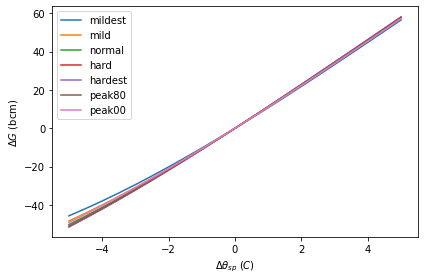

In [23]:
for scenario, _df in dict_dfs_annual_gas.items():
    plt.plot((_df.sum()-_df[0.0].sum())/1000, label=scenario)
plt.ylabel(r'$\Delta G$ (bcm)')
plt.xlabel(r'$\Delta \theta_{sp} \; (C)$')
plt.legend()
plt.tight_layout()
plt.savefig('delta_gas_demand_bcm_whole_europe.png', dpi=300)
plt.show()